In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install fastai numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [4]:
import numpy
print(numpy.__version__)


2.0.2


In [5]:
pip install --upgrade matplotlib fastai pybind11


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.4 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.7.29
    Uninstalling fastcore-1.7.29:
      Successfully uninstalled fastcore-1.7.29
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.19
    Uninstalling fastai-2.7.19:
      Successfully uninstalled fastai-2.7.19


In [6]:
from fastai.vision.all import *
from pathlib import Path

Data path

In [7]:
path = Path("/content/drive/MyDrive/Image_classification_soid_datasets/")
train_path = path/'/content/drive/MyDrive/Image_classification_soid_datasets/Train/'
test_path = path/'/content/drive/MyDrive/Image_classification_soid_datasets/Test/'

สร้าง DataLoader โดยใช้ชื่อโฟลเดอร์เป็น Label

In [8]:
dls = ImageDataLoaders.from_folder(
    train_path,
    valid_pct=0.2,       # แบ่ง valid 20%
    seed=42,
    item_tfms=Resize(224),   # Resize ให้เป็นขนาดเดียวกัน
    batch_tfms=aug_transforms(mult=1.0),
    bs=32                # batch size
)


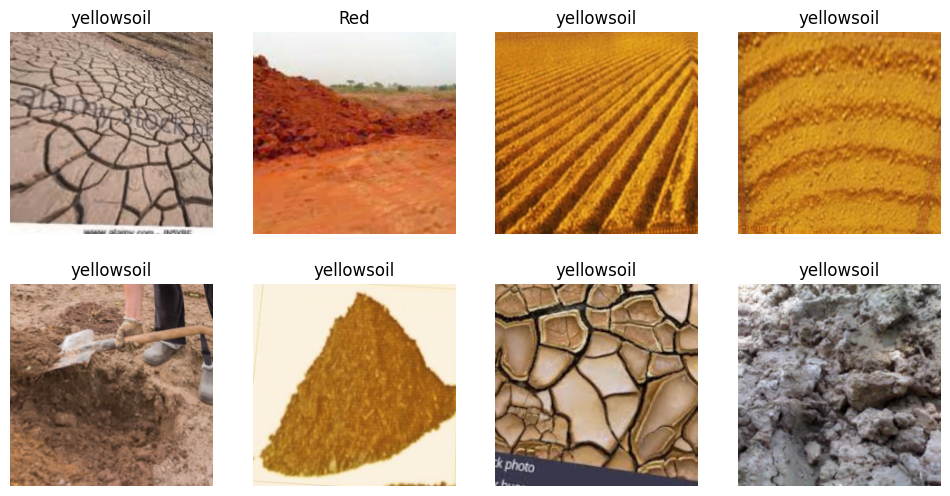

In [9]:
dls.show_batch(max_n=8)

สร้างโมเดลด้วย ResNet

In [10]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 186MB/s]


Train

In [11]:
learn.fine_tune(50)

epoch,train_loss,valid_loss,accuracy,time
0,2.246236,1.063095,0.688889,00:53


epoch,train_loss,valid_loss,accuracy,time
0,1.232232,0.564320,0.811111,00:06
1,1.107310,0.350956,0.900000,00:04
2,0.948699,0.275513,0.900000,00:05
3,0.783943,0.197395,0.955556,00:05
4,0.673317,0.134677,0.966667,00:04
5,0.578076,0.113543,0.977778,00:06
6,0.489103,0.075711,0.977778,00:04
7,0.428249,0.079891,0.988889,00:05
8,0.370145,0.079034,0.977778,00:05
9,0.334036,0.074556,0.966667,00:04


plot learning curve

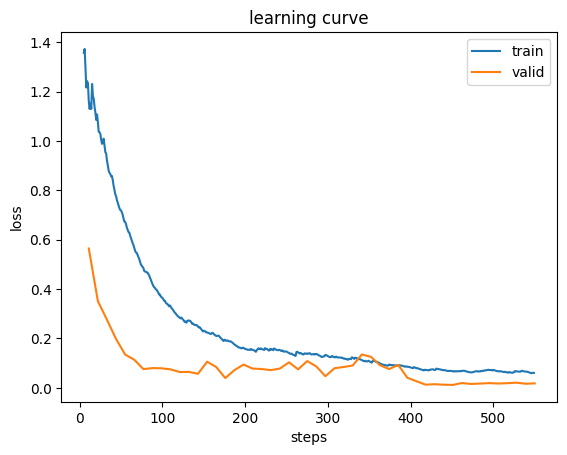

In [12]:
learn.recorder.plot_loss()
plt.show()

Confusion Metric

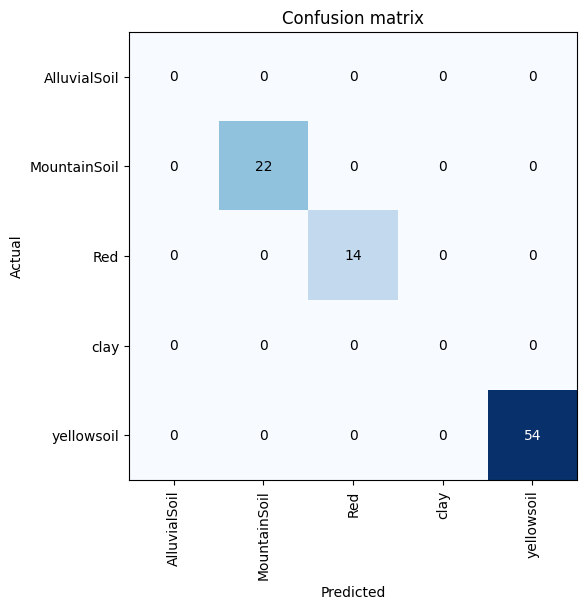

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))

test_data

In [14]:
test_files = get_image_files(test_path)
for img in test_files[:5]:  # ทดสอบแค่บางภาพ
    pred, pred_idx, probs = learn.predict(img)
    print(f"{img.name} ➜ Predicted: {pred}, Probability: {probs[pred_idx]:.4f}")


pngtree-textured-clay-background-image_13729271.png ➜ Predicted: Red, Probability: 0.5811


pngtree-cracked-surface-of-arid-orange-clay-reveals-intricate-textures-image_13859463.png ➜ Predicted: yellowsoil, Probability: 0.9475


LINE_ALBUM_ไฟ_250725_2.jpg ➜ Predicted: MountainSoil, Probability: 1.0000


pngtree-intimate-view-of-intricate-clay-texture-image_13618012.png ➜ Predicted: Red, Probability: 0.9857


Expansive-Clay-Soil-in-Dallas-The-Hidden-Geotechnical-Challenge-Beneath-Our-Feet.jpg ➜ Predicted: yellowsoil, Probability: 0.9998


In [15]:
learn.export("/content/drive/MyDrive/Image_classification_soid_datasets/my_fastai_model.pkl")

Test_model

In [17]:
learn_inf = load_learner("/content/drive/MyDrive/Image_classification_soid_datasets/my_fastai_model.pkl")

# ทำนายภาพใหม่
img = PILImage.create("/content/drive/MyDrive/Image_classification_soid_datasets/Test/3f6e10844fb34bb191e4e6e1f92f0e09.jpg")
pred_class, pred_idx, outputs = learn_inf.predict(img)
print(f"Prediction: {pred_class}, Probability: {outputs[pred_idx]:.4f}")


Prediction: yellowsoil, Probability: 0.5600
